# Использование sql в Python.

**Содержание:**
1. [Создание Базы Данных](#1.-Создание-Базы-Данных.);
2. [Задача по выборке данных из БД](#2.-Задача-по-выборке-данных-из-БД.).

## 1. Создание Базы Данных.
В качестве БД используется пример с сайта sql-ex.ru, а именно БД кораблей: https://www.sql-ex.ru/help/select13.php#db_3

Импортируем необходимые модули. 

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
from sqlalchemy import create_engine

Определяем переменные.  
*direction* - папка с таблицами в Excel c сайта sql-ex.  
*dict_table* - словарь с указаниями названий файлов и таблиц.
*dbfile* - название создаваемого файла БД.

Создаем новый объект *engine*. В качестве движка используем sqlite.

In [2]:
# Путь хранения примера данных.
direction = 'from_sql_ex/'

# Словарь, включающий имя файла (ключ) и название таблицы с индексом (значение)
dict_table = {'Classes.xlsx':['Classes','class'],
             'Ships.xlsx':['Ships','name'],
             'Outcomes.xlsx':['Outcomes','ship'],
             'Battles.xlsx':['Battles','name']}

dbfile = 'ships.sqlite'
engine = create_engine(f'sqlite:///{dbfile}', echo=False)

**Функция для обработки данных из экселся в БД:**

In [3]:
# Функция для записи данных из экселя в базу данных 
def excel_to_sql(direction, filename, name_table, index_col):
    df_classes = pd.read_excel(direction + filename, index_col = index_col)
    
    try:
        df_classes.to_sql(name_table, con=engine)#, if_exists='fail')
        print("Таблица {} успешно записана!".format(name_table))     
    except ValueError:
        print("Таблица {} уже существует!".format(name_table))   


**Запись в БД:**

In [4]:
# Запись в базу данных всех перечисленных таблиц.
for k,v in dict_table.items():
    excel_to_sql(direction, k, v[0], v[1])

Таблица Classes успешно записана!
Таблица Ships успешно записана!
Таблица Outcomes успешно записана!
Таблица Battles успешно записана!


**Проверка таблицы Outcomes:**

In [5]:
engine.execute("Select * FROM Outcomes").fetchall()

[('Bismarck', 'North_Atlantic', 'sunk'),
 ('California', 'Guadalcanal', 'damaged'),
 ('CAlifornia', 'Surigao_Strait', 'ok'),
 ('Duke_of_York', 'North_Cape', 'ok'),
 ('Fuso', 'Surigao_Strait', 'sunk'),
 ('Hood', 'North_Atlantic', 'sunk'),
 ('King_George_V', 'North_Atlantic', 'ok'),
 ('Kirishima', 'Guadalcanal', 'sunk'),
 ('Prince_of_Wales', 'North_Atlantic', 'damaged'),
 ('Rodney', 'North_Atlantic', 'OK'),
 ('Schamhorst', 'North_Cape', 'sunk'),
 ('South_Dakota', 'Guadalcanal', 'damaged'),
 ('Tennessee', 'Surigao_Strait', 'ok'),
 ('Washington', 'Guadalcanal', 'ok'),
 ('West_Virginia', 'Surigao_Strait', 'ok'),
 ('Yamashiro', 'Surigao_Strait', 'sunk')]

In [6]:
df_classes = pd.read_excel(direction + 'Outcomes.xlsx', index_col = 'ship')
df_classes

,battle,result
ship,,
Bismarck,North_Atlantic,sunk
California,Guadalcanal,damaged
CAlifornia,Surigao_Strait,ok
Duke_of_York,North_Cape,ok
Fuso,Surigao_Strait,sunk
Hood,North_Atlantic,sunk
King_George_V,North_Atlantic,ok
Kirishima,Guadalcanal,sunk
Prince_of_Wales,North_Atlantic,damaged


Данные из созданной БД совпадают с Excel.

## 2. Задача по выборке данных из БД.

Задача №51 с сайта sql-ex.ru:  
*Найдите названия кораблей, имеющих наибольшее число орудий среди всех имеющихся кораблей такого же водоизмещения (учесть корабли из таблицы Outcomes).*

Импортируем модуль *sqlite3*. Подключаемся к БД и создаем курсор.

In [7]:
import sqlite3
#Подключение к базе
connection = sqlite3.connect(dbfile)
#Создание курсора
cursor = connection.cursor()

**Формирование запроса:**

In [8]:
searchText = """
WITH maxguns AS (
SELECT MAX(numGuns) as ng, displacement
FROM Classes
WHERE class in (SELECT class FROM ships) or
class in (SELECT ship FROM outcomes)
GROUP BY displacement)

SELECT name
FROM Ships s JOIN Classes c ON
s.class=c.class JOIN maxguns m ON
c.displacement=m.displacement
WHERE numGuns=ng
UNION
SELECT ship
FROM Outcomes o JOIN Classes c ON
o.ship=c.class JOIN maxguns m ON
c.displacement=m.displacement
WHERE numGuns=ng
""" 

**Непосредственно сам запрос и вывод данных:**

In [9]:
# Выборка из таблицы
try:
    rows = cursor.execute(searchText)
    for row in rows:
        print(row[0])
except sqlite3.OperationalError:
    pass

Bismarck
California
Iowa
Missouri
Musashi
New_Jersey
North_Carolina
Ramillies
Revenge
Royal_Oak
Royal_Sovereign
South_Dakota
Tennessee
Washington
Wisconsin
Yamato


In [10]:
#Подтверждение отправки данных в базу
connection.commit()
#Завершение соединения
cursor.close()
connection.close()

**Ответ соответствует защитанному на сайте sql-ex.ru:**

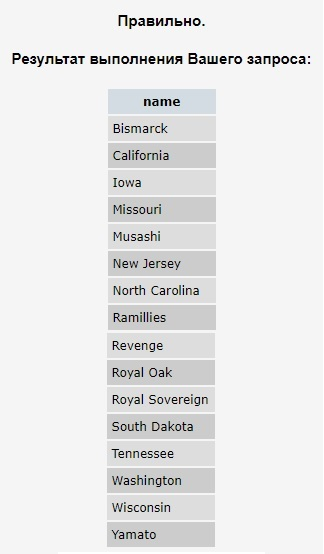